In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

**pogrubiony tekst**# Metoda najmniejszych kwadratów

In [2]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


NameError: name 'plt' is not defined

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


In [1]:

import numpy as np

n = 1000
a_true = 2.3
b_true = 5.0
sigma = 3.0

rng = np.random.default_rng(42)

x = rng.normal(loc=0.0, scale=10.0, size=n)
noise = rng.normal(loc=0.0, scale=sigma, size=n)
y = a_true * x + b_true + noise

a_hat, b_hat = np.polyfit(x, y, deg=1)

print(f"a_hat = {a_hat:.6f}")
print(f"b_hat = {b_hat:.6f}")

#a_hat=Nachylenie
#b_hat=Wyraz Wolny

a_hat = 2.297571
b_hat = 4.755163


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Korelacja Pearsona r = -0.2770, p-value = 0.002008
Regresja liniowa: PEFR ≈ a*Exposure + b
a (nachylenie) = -4.184576
b (wyraz wolny) = 424.582807
R^2 = 0.0767


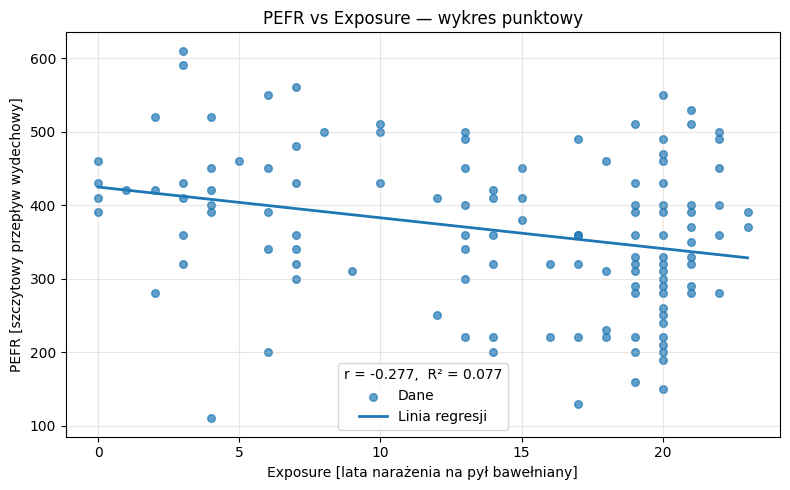

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

df = pd.read_csv("LungDisease.csv")

#Usunięcie wierszy z brakami w analizowanych kolumnach
df = df.dropna(subset=["Exposure", "PEFR"])

#Wykres punktowy
plt.figure(figsize=(8, 5))
plt.scatter(df["Exposure"], df["PEFR"], s=30, alpha=0.7, label="Dane")
plt.xlabel("Exposure [lata narażenia na pył bawełniany]")
plt.ylabel("PEFR [szczytowy przepływ wydechowy]")
plt.title("PEFR vs Exposure — wykres punktowy")
plt.grid(True, alpha=0.3)

#Person
r, p_value = pearsonr(df["Exposure"], df["PEFR"])
print(f"Korelacja Pearsona r = {r:.4f}, p-value = {p_value:.4g}")

#Regresja liniowa
res = linregress(df["Exposure"], df["PEFR"])
a_hat, b_hat = res.slope, res.intercept
r2 = res.rvalue**2

print(f"Regresja liniowa: PEFR ≈ a*Exposure + b")
print(f"a (nachylenie) = {a_hat:.6f}")
print(f"b (wyraz wolny) = {b_hat:.6f}")
print(f"R^2 = {r2:.4f}")

#Linia regresji na wykresie
x_line = np.linspace(df["Exposure"].min(), df["Exposure"].max(), 300)
y_line = a_hat * x_line + b_hat
plt.plot(x_line, y_line, linewidth=2, label="Linia regresji")

#Podpisy/legenda z metrykami
plt.legend(title=f"r = {r:.3f},  R² = {r2:.3f}")
plt.tight_layout()
plt.show()


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



 set       a    se_a       b    se_b       r      R2
set1  0.5001  0.1179  3.0001  1.1247  0.8164  0.6665
set2  0.5000  0.1180  3.0009  1.1253  0.8162  0.6662
set3  0.4997  0.1179  3.0025  1.1245  0.8163  0.6663
set4  0.4999  0.1178  3.0017  1.1239  0.8165  0.6667


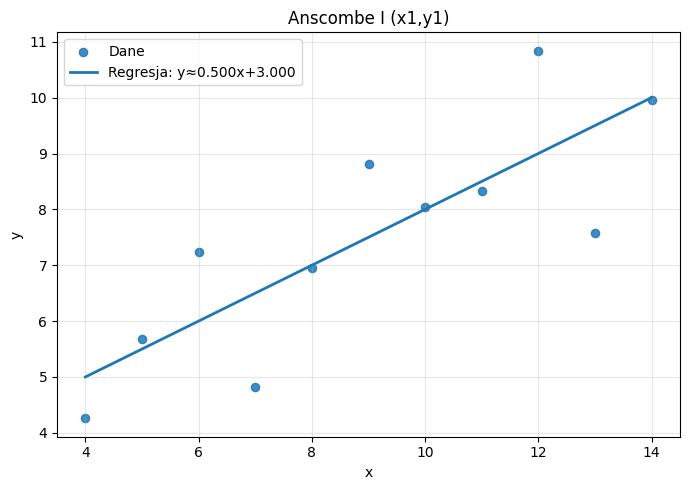

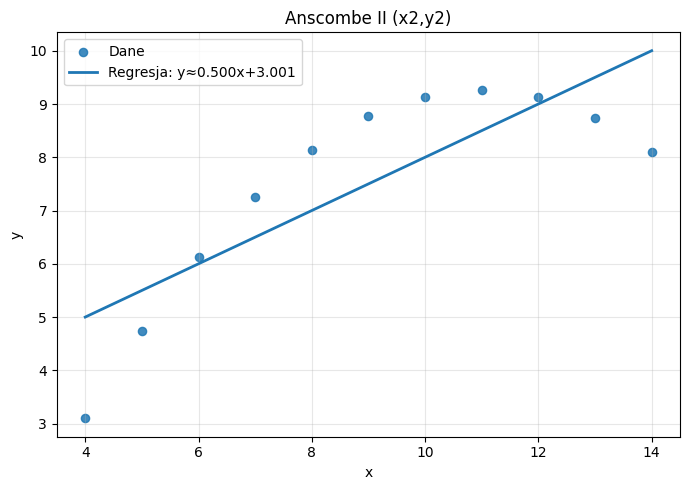

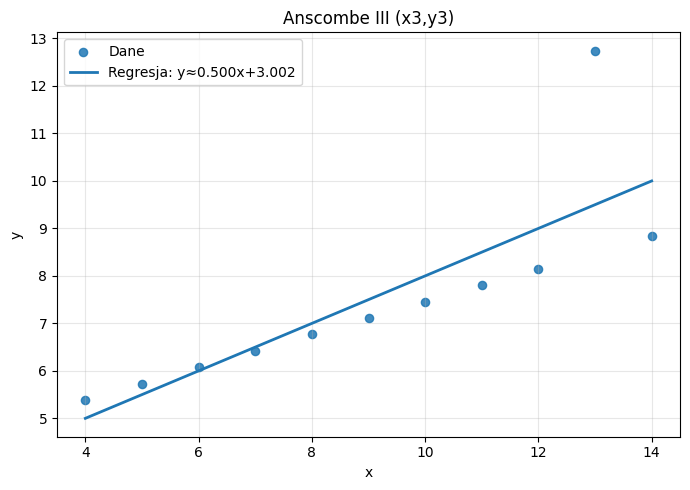

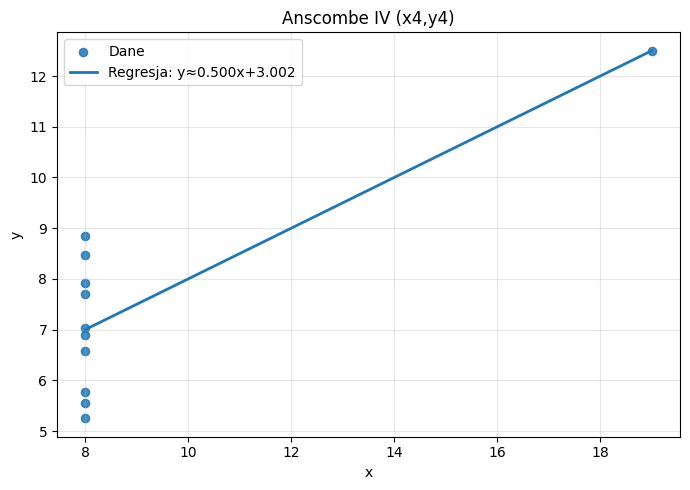

In [12]:

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt


CSV_PATH = "/content/anscombe.csv"

def load_anscombe_any(path: str) -> pd.DataFrame:
    """Wczytaj anscombe.csv niezależnie od nietypowych nagłówków i zwróć szeroką ramkę x1..y4."""
    if not os.path.isfile(path):
        raise FileNotFoundError(f"Nie znaleziono pliku: {path}")

    try:
        df = pd.read_csv(path, header=1)
        cols = list(df.columns)
        mapping, xk, yk = {}, 0, 0
        for c in cols:
            base = str(c).strip().lower()
            if base.startswith("x"):
                xk += 1; mapping[c] = f"x{xk}"
            elif base.startswith("y"):
                yk += 1; mapping[c] = f"y{yk}"
        wide = df.rename(columns=mapping)
        keep = ["x1","y1","x2","y2","x3","y3","x4","y4"]
        if all(k in wide.columns for k in keep):
            wide = wide[keep].apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)
            return wide
    except Exception:
        pass

    df0 = pd.read_csv(path, header=None)
    row1 = df0.iloc[1].astype(str).str.strip().str.lower().tolist()
    if row1.count("x") == 4 and row1.count("y") == 4:
        data = df0.iloc[2:].copy()
        names = []
        xk = yk = 0
        for val in row1:
            if val == "x":
                xk += 1; names.append(f"x{xk}")
            elif val == "y":
                yk += 1; names.append(f"y{yk}")
            else:
                names.append(val)
        data.columns = names
        keep = ["x1","y1","x2","y2","x3","y3","x4","y4"]
        data = data[keep].apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)
        return data

    try:
        df = pd.read_csv(path)
        low = {c: c.strip().lower() for c in df.columns}
        df = df.rename(columns=low)
        if {"dataset","x","y"}.issubset(df.columns):
            lab = df["dataset"].astype(str).str.strip().str.upper().map(
                {"I":"1","II":"2","III":"3","IV":"4","1":"1","2":"2","3":"3","4":"4"}
            )
            df["_g"] = lab
            parts = []
            for g, gdf in df.groupby("_g"):
                gdf = gdf[["x","y"]].reset_index(drop=True).rename(columns={"x": f"x{g}", "y": f"y{g}"})
                parts.append(gdf)
            wide = pd.concat(parts, axis=1)
            keep = ["x1","y1","x2","y2","x3","y3","x4","y4"]
            wide = wide[keep].apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)
            return wide
    except Exception:
        pass

    raise ValueError("Nie rozpoznaję struktury CSV. Upewnij się, że plik ma dane Anscombe'a.")

def ols_with_errors(x, y):
    """MNK dla y = a*x + b + eps; zwraca a,b, se_a, se_b, r, R^2 (bez SciPy)."""
    x = np.asarray(x, float); y = np.asarray(y, float); n = x.size
    X = np.column_stack([x, np.ones(n)])
    XtX = X.T @ X
    beta = np.linalg.inv(XtX) @ (X.T @ y)
    a, b = beta
    yhat = X @ beta
    resid = y - yhat
    rss = float((resid**2).sum())
    sigma2 = rss / (n - 2)
    cov = sigma2 * np.linalg.inv(XtX)
    se_a, se_b = np.sqrt(np.diag(cov))
    r = float(((x - x.mean())*(y - y.mean())).sum() / np.sqrt(((x - x.mean())**2).sum()*((y - y.mean())**2).sum()))
    r2 = 1.0 - rss / float(((y - y.mean())**2).sum())
    return a, b, se_a, se_b, r, r2

wide = load_anscombe_any(CSV_PATH)

pairs = [("x1","y1"), ("x2","y2"), ("x3","y3"), ("x4","y4")]
rows = []
for i, (xc,yc) in enumerate(pairs, start=1):
    a,b,se_a,se_b,r,r2 = ols_with_errors(wide[xc].values, wide[yc].values)
    rows.append([f"set{i}", a, se_a, b, se_b, r, r2])
res_df = pd.DataFrame(rows, columns=["set","a","se_a","b","se_b","r","R2"])
print(res_df.to_string(index=False, float_format=lambda v: f"{v: .4f}"))

# wykresy
titles = ["Anscombe I", "Anscombe II", "Anscombe III", "Anscombe IV"]
for (xc,yc), t, r in zip(pairs, titles, rows):
    a,b = r[1], r[3]
    x = wide[xc].to_numpy(); y = wide[yc].to_numpy()
    xs = np.linspace(x.min(), x.max(), 200); ys = a*xs + b
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, s=35, alpha=0.85, label="Dane")
    plt.plot(xs, ys, linewidth=2, label=f"Regresja: y≈{a:.3f}x+{b:.3f}")
    plt.title(f"{t} ({xc},{yc})")
    plt.xlabel("x"); plt.ylabel("y"); plt.grid(True, alpha=0.3); plt.legend()
    plt.tight_layout(); plt.show()
